Código elaborado por Claudiomar Filho para fins didáticos em 07/09/2025

# 📊 Análise Estatística: Idade Média da População e Taxa de Homicídios

Este notebook tem como objetivo mostrar, de forma **didática e aplicada**, como podemos usar **estatística e regressão linear** para entender como varia a  **Taxa de homicídios por países**
Para responder a essas perguntas, usaremos **regressão linear simples e múltipla**, que nos permite ajustar uma reta e verificar a força e a direção dessa relação.
---

## 🔎 Contexto

A estatística é uma ferramenta essencial para compreender fenômenos sociais complexos.  



---

## 📈 O que vamos aprender aqui?

1. **Visualização inicial dos dados**  
   - Usaremos **boxplots** e **scatterplots** para inspecionar a variável taxa de homicídio.  
   - Isso nos ajuda a identificar a presença de **outliers** (valores muito extremos) que podem distorcer as análises.  

2. **Construção do modelo de regressão simples**  
   - Definiremos uma variável **explicativa (independente)** → `idade_media`  
   - Definiremos uma variável **resposta (dependente)** → `taxa_de_homicidio`  
   - Ajustaremos um modelo de regressão linear para quantificar a relação e posteriormente um modelo de regressão linear múltipla para tentar explicar ainda mais a taxa de homicídios.  

3. **Interpretação dos resultados da regressão**  
   - Coeficientes (β₀, β₁...) → mostram a relação entre a taxa de homicídio e outras variáveis.  
   - R² → mede o quanto a variação da taxa de homicídio é explicada pelo modelo
   - P-valores → testam se a relação encontrada é **estatisticamente significativa**.  

---

## 🎯 Importância para a prática

Essa análise mostra como **métodos estatísticos simples** já podem trazer insights relevantes para a gestão pública.  
Por exemplo: se descobrirmos que a **estrutura etária da população** está fortemente relacionada às taxas de homicídio, isso pode indicar políticas de segurança, prevenção e educação mais direcionadas para grupos populacionais específicos.

---

✅ Ao longo do notebook, cada célula de código será explicada **linha por linha**, para que você entenda não apenas *como* fazer, mas também *por que* cada passo é importante.


In [4]:
# 📦 Importar bibliotecas necessárias
import pandas as pd
from google.colab import files
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 📤 Fazer upload do arquivo Excel
uploaded = files.upload()

# 📚 Ler o arquivo Excel (ajuste o nome se for diferente)
df = pd.read_excel("homicidio.xlsx")

# 👇 Essa linha altera a forma como os números são exibidos no pandas, ou seja, com duas casas decimais
pd.options.display.float_format = '{:,.2f}'.format

# 👀 Mostrar as 5 primeiras linhas da planilha
df.head(15)


Saving homicidio.xlsx to homicidio (1).xlsx


,pais,regiao,taxa_de_homicidio,gini,indice_dem,idade_media,pib_pct,alfabetizacao
0,El Salvador,América Central e Caribe,52.02,NaN,5.90,27.70,"3,821,286.00",88.50
1,Jamaica,América Central e Caribe,43.85,45.50,7.13,29.40,"5,220,808.00",88.70
2,Lesotho,África,41.25,44.90,6.30,24.70,"924,208.00",79.40
3,Honduras,América Central e Caribe,38.93,52.10,5.36,24.40,"2,412,435.00",87.20
4,Belize,América Central e Caribe,37.90,53.30,NaN,23.90,"3,733,975.00",NaN
5,Venezuela,América do Sul,36.69,46.90,2.76,30.00,"1,739,112.00",97.10
6,Saint Vincent and the Grenadines,América Central e Caribe,36.46,NaN,NaN,35.30,NaN,NaN
7,South Africa,África,36.40,NaN,7.05,28.00,"4,735,747.00",87.00
8,Saint Kitts and Nevis,América Central e Caribe,34.23,NaN,NaN,36.50,NaN,NaN
9,Bahamas,América Central e Caribe,30.90,NaN,NaN,32.80,"30,026,735.00",NaN


In [5]:
# Primeiro, como sempre, vamos entender nossos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pais               201 non-null    object 
 1   regiao             201 non-null    object 
 2   taxa_de_homicidio  201 non-null    float64
 3   gini               144 non-null    float64
 4   indice_dem         161 non-null    float64
 5   idade_media        187 non-null    float64
 6   pib_pct            174 non-null    float64
 7   alfabetizacao      148 non-null    float64
dtypes: float64(6), object(2)
memory usage: 12.7+ KB


In [6]:
#Analisando os dados vemos que há muitas linhas com null. Vamos prosseguir
#Agora vamos ver nossa estatística descritiva

df.describe()

,taxa_de_homicidio,gini,indice_dem,idade_media,pib_pct,alfabetizacao
count,201.00,144.00,161.00,187.00,174.00,148.00
mean,6.81,36.61,5.38,30.68,"12,983,691.70",84.30
std,9.30,10.27,2.24,8.82,"18,523,476.75",19.15
min,0.16,0.00,1.08,14.80,0.00,19.10
25%,1.30,32.27,3.29,23.60,"1,801,335.75",76.08
50%,3.15,36.10,5.71,30.00,"4,421,695.50",93.75
75%,7.70,42.88,7.13,38.15,"15,083,500.25",98.40
max,52.02,59.10,9.81,48.60,"109,602,322.00",100.00


In [7]:
# 🧩 Antes de tudo: o problema
# Alguns países têm valor 0 nas colunas 'pib_pct' (PIB per capita) e 'gini' (índice de desigualdade).
# Como é impossível um país ter PIB per capita igual a 0 ou índice de Gini igual a 0,
# esses zeros indicam dados faltantes (ausência de informação) e precisam ser tratados.

# O termo 'np.nan' significa "Not a Number" e é usado para representar valores ausentes (vazios) numéricos.

# 🧹 .replace() é um método do pandas usado para substituir valores dentro de uma coluna.
# A estrutura é: df["coluna"].replace(valor_antigo, valor_novo)
# Aqui, substituímos todos os valores iguais a 0 por np.nan.

df["pib_pct"] = df["pib_pct"].replace(0, np.nan)
# 👉 Nesta linha, todos os zeros na coluna 'pib_pct' são trocados por np.nan
#    Ou seja, transformamos "dados incorretos" (zero) em "dados ausentes" (NaN)

df["gini"] = df["gini"].replace(0, np.nan)
# 👉 Mesma lógica: todos os zeros em 'gini' passam a ser NaN.


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pais               201 non-null    object 
 1   regiao             201 non-null    object 
 2   taxa_de_homicidio  201 non-null    float64
 3   gini               139 non-null    float64
 4   indice_dem         161 non-null    float64
 5   idade_media        187 non-null    float64
 6   pib_pct            171 non-null    float64
 7   alfabetizacao      148 non-null    float64
dtypes: float64(6), object(2)
memory usage: 12.7+ KB


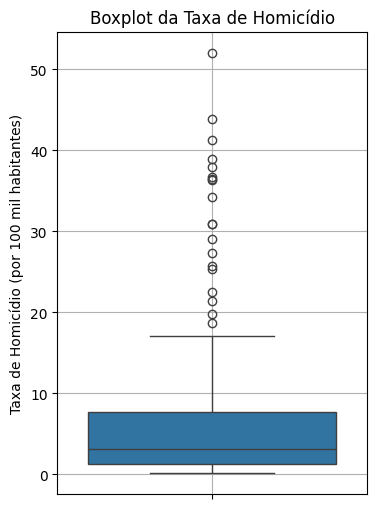

In [8]:
# 📦 Boxplot vertical da variável taxa_de_homicidio
plt.figure(figsize=(4, 6))  # Tamanho vertical da figura
sns.boxplot(y=df["taxa_de_homicidio"])  # Agora é eixo y, para ficar na vertical
plt.title("Boxplot da Taxa de Homicídio")  # Título do gráfico
plt.ylabel("Taxa de Homicídio (por 100 mil habitantes)")  # Rótulo do eixo y
plt.grid(True)  # Adiciona grade
plt.show()


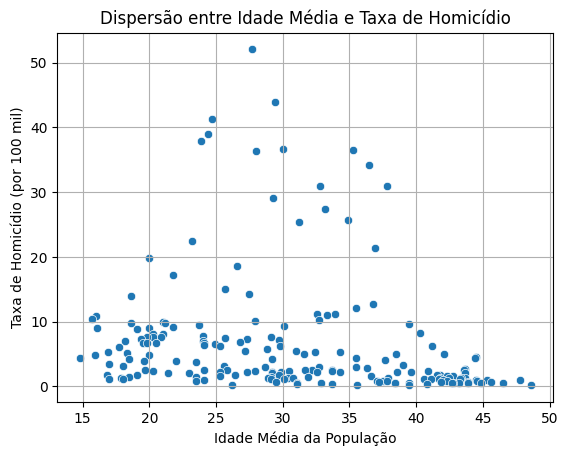

In [9]:
# Criar o gráfico de dispersão (scatterplot)
sns.scatterplot(x="idade_media", y="taxa_de_homicidio", data=df)

# Adicionar título e rótulos
plt.title("Dispersão entre Idade Média e Taxa de Homicídio")
plt.xlabel("Idade Média da População")
plt.ylabel("Taxa de Homicídio (por 100 mil)")
plt.grid(True)  # Adiciona grade para facilitar a visualização
plt.show()


In [10]:
#Os outliers estão atrapalhando bastante. Vamos retirá-los

# 📌 Calcular os quartis da coluna "taxa_de_homicidio"
q1 = df["taxa_de_homicidio"].quantile(0.25)  # 1º quartil (25% dos dados estão abaixo desse valor)
q3 = df["taxa_de_homicidio"].quantile(0.75)  # 3º quartil (75% dos dados estão abaixo desse valor)

# 🧮 Calcular o intervalo interquartil (IQR)
iqr = q3 - q1  # IQR = intervalo entre o Q3 e o Q1 → onde estão os dados mais "normais"

# 🚫 Definir limites para detectar outliers
limite_inferior = q1 - 1.5 * iqr  # Valores abaixo desse limite serão considerados outliers
limite_superior = q3 + 1.5 * iqr  # Valores acima desse limite também serão considerados outliers

# ✅ Filtrar o DataFrame original, removendo os outliers da taxa de homicídio
df= df[
    (df["taxa_de_homicidio"] >= limite_inferior) &  # Mantém os valores acima ou iguais ao limite inferior
    (df["taxa_de_homicidio"] <= limite_superior)    # E abaixo ou iguais ao limite superior
]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 19 to 200
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pais               182 non-null    object 
 1   regiao             182 non-null    object 
 2   taxa_de_homicidio  182 non-null    float64
 3   gini               130 non-null    float64
 4   indice_dem         149 non-null    float64
 5   idade_media        168 non-null    float64
 6   pib_pct            155 non-null    float64
 7   alfabetizacao      136 non-null    float64
dtypes: float64(6), object(2)
memory usage: 12.8+ KB


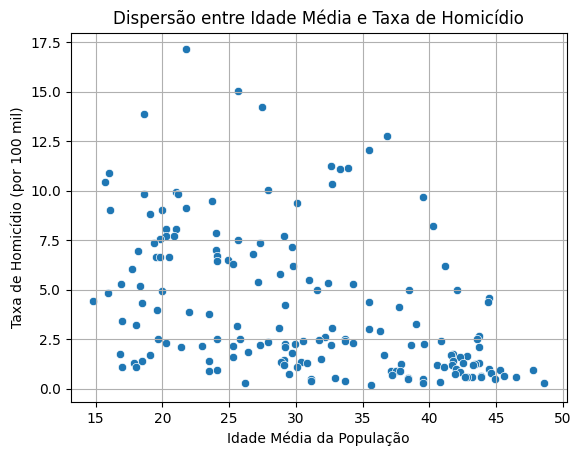

In [11]:
# Criar o gráfico de dispersão (scatterplot) (agora sem outliers)
sns.scatterplot(x="idade_media", y="taxa_de_homicidio", data=df)

# Adicionar título e rótulos
plt.title("Dispersão entre Idade Média e Taxa de Homicídio")
plt.xlabel("Idade Média da População")
plt.ylabel("Taxa de Homicídio (por 100 mil)")
plt.grid(True)  # Adiciona grade para facilitar a visualização
plt.show()


In [13]:
#Vamos agora preparar os valores para elaboração da regressão. Primeiro ponto, temos que tirar os valores nulos

df = df.dropna()
# Reextraímos as colunas já sem linhas com valores ausentes.
X = df["idade_media"]           # Agora X é uma Series numérica, sem NaN.
                                   # Seleciona a coluna 'idade_media' como variável explicativa (independente).
                                   # É a variável que tentará "explicar" as variações em y.
y = df["taxa_de_homicidio"]     # Agora y é uma Series numérica, sem NaN.
                                   # Seleciona a coluna 'taxa_de_homicidio' como variável resposta (dependente).
                                   # É o alvo que queremos modelar/prever a partir de X.


# ➕ Adicionar uma constante à variável X
# `sm.add_constant(X)` cria uma nova coluna chamada 'const' (com 1 em todas as linhas).
# Isso permite estimar o INTERCEPTO (β0) na regressão. Sem essa constante, a reta seria forçada a passar pela origem (0),
# o que geralmente não é desejável (poderia enviesar a inclinação/coeficientes).
X_const = sm.add_constant(X)       # Resultado é um DataFrame com duas colunas: 'const' e 'idade_media'.

# 🧠 Ajustar o modelo de regressão linear usando OLS (Ordinary Least Squares)
# `sm.OLS(y, X_const)` define o modelo de Mínimos Quadrados Ordinários (OLS) com:
#   - y: variável dependente (resposta)
#   - X_const: matriz de preditores (constante + idade_media)
# `.fit()` faz a estimação dos parâmetros (coeficientes) que minimizam o erro quadrático.
modelo = sm.OLS(y, X_const).fit()

# 📊 Exibir o resumo estatístico da regressão
# `summary()` imprime uma tabela com:
#   - Coeficientes estimados (β0 e β1), erros-padrão, estatística t e p-valores (significância)
#   - R² e R² ajustado (qualidade do ajuste)
#   - Estatística F e seu p-valor (teste global do modelo)
#   - Intervalos de confiança, informações de número de observações, etc.
print(modelo.summary())



                            OLS Regression Results                            
Dep. Variable:      taxa_de_homicidio   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     25.45
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           2.09e-06
Time:                        23:08:41   Log-Likelihood:                -258.34
No. Observations:                 100   AIC:                             520.7
Df Residuals:                      98   BIC:                             525.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.7193      1.084      8.970      

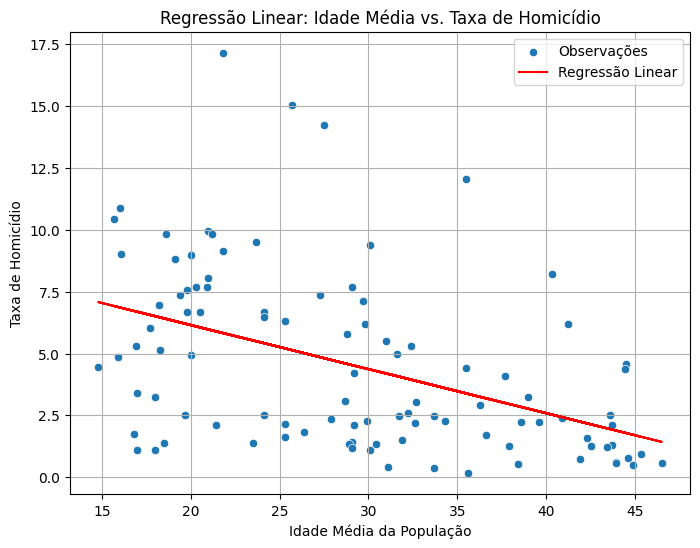

In [14]:
# 📍 Criar o gráfico de dispersão (scatterplot) dos dados reais
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
sns.scatterplot(x=X, y=y, label="Observações")  # Pontos reais do conjunto de dados

# 📈 Plotar a linha de regressão
# Primeiro usamos o modelo para prever os valores de y (linha_predita)
linha_predita = modelo.predict(X_const)  # Gera os valores previstos de y com base em X
plt.plot(X, linha_predita, color='red', label="Regressão Linear")  # Linha de tendência

# 🛠️ Personalização do gráfico
plt.title("Regressão Linear: Idade Média vs. Taxa de Homicídio")  # Título do gráfico
plt.xlabel("Idade Média da População")  # Nome do eixo X
plt.ylabel("Taxa de Homicídio")         # Nome do eixo Y
plt.legend()                            # Mostra a legenda com rótulos
plt.grid(True)                          # Ativa o fundo quadriculado
plt.show()                              # Exibe o gráfico


## 📊 Interpretação da Regressão Linear: Idade Média vs. Taxa de Homicídio

Nesta análise, realizamos uma **regressão linear simples** para entender como a **idade média da população** influencia a **taxa de homicídio** entre municípios.

O modelo gerado foi do tipo:

$$
\text{taxa_de_homicidio} = \beta_0 + \beta_1 \cdot \text{idade_media}
$$



---

### 🧮 Coeficientes encontrados:

- **Intercepto (const): 9.71**  
  Representa a taxa de homicídio prevista quando a idade média da população é zero (valor teórico, sem aplicação prática direta).

- **Coeficiente da idade_média: -0.17**  
  A cada **1 ano a mais na idade média da população**, a **taxa de homicídio diminui, em média, 0,17 pontos**.

---

### 📌 Interpretação prática:

> Em média, **municípios com população mais velha tendem a ter taxas de homicídio mais baixas**.  
> Se um município tiver a idade média aumentada em 5 anos, por exemplo, espera-se que a taxa de homicídio caia cerca de **0,85 pontos** (5 × -0,17).

---

### 🧪 Significância estatística:

- O **p-valor do coeficiente idade_média foi menor que 0.01**, o que indica que:
  - A relação entre idade média e taxa de homicídio é **estatisticamente significativa**.
  - Ou seja, **é muito improvável que essa associação seja fruto do acaso**.

---

### 📈 Qualidade do modelo (R² = 0.206):

- O valor de **R² = 0.206** indica que a idade média **explica cerca de 20,6% da variação** na taxa de homicídio entre os municípios analisados.
- Isso significa que **existem outras variáveis relevantes** que também influenciam a taxa de homicídio (como renda, desigualdade, educação etc.).

---

### ✅ Conclusão:

- Existe uma **associação negativa e significativa** entre idade média da população e taxa de homicídio.
- O modelo é simples, mas já nos ajuda a **levantar hipóteses e entender padrões sociais importantes**.

### !!Agora vamos partir para uma regressão múltipla!!


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 19 to 200
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pais               100 non-null    object 
 1   regiao             100 non-null    object 
 2   taxa_de_homicidio  100 non-null    float64
 3   gini               100 non-null    float64
 4   indice_dem         100 non-null    float64
 5   idade_media        100 non-null    float64
 6   pib_pct            100 non-null    float64
 7   alfabetizacao      100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 7.0+ KB


In [16]:
# 🎯 Definir a variável dependente (resposta)
y = df["taxa_de_homicidio"]

# 🧠 Definir as variáveis independentes (explicativas)
X = df[["gini", "indice_dem", "idade_media", "pib_pct", "alfabetizacao"]]

# ➕ Adicionar a constante (intercepto) ao modelo
X_const = sm.add_constant(X)

# 🧮 Ajustar o modelo de regressão linear múltipla
modelo_multiplo = sm.OLS(y, X_const).fit()

# 📋 Exibir o resumo dos resultados
print(modelo_multiplo.summary())


                            OLS Regression Results                            
Dep. Variable:      taxa_de_homicidio   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     7.294
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           8.19e-06
Time:                        23:09:58   Log-Likelihood:                -253.49
No. Observations:                 100   AIC:                             519.0
Df Residuals:                      94   BIC:                             534.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1063      2.728      1.505

# 📉 Interpretação da Regressão Linear Múltipla

Realizamos uma **regressão linear múltipla** para entender como diferentes variáveis explicam a **taxa de homicídios** por país.

O modelo gerado tem a seguinte estrutura:

$$
\text{taxa_de_homicidio} = \beta_0 + \beta_1 \cdot \text{gini} + \beta_2 \cdot \text{indice_dem} + \beta_3 \cdot \text{idade_media} + \beta_4 \cdot \text{pib_pct} + \beta_5 \cdot \text{alfabetizacao}
$$



## 🎯 Principais Resultados

- **R² = 0.280** → O modelo explica **28% da variação** na taxa de homicídios.  
- O p-valor do modelo como um todo é **muito pequeno (< 0.001)**, indicando que o conjunto de variáveis tem poder explicativo.

### 🧪 Análise variável por variável (com base no p-valor):

| Variável         | Coeficiente | p-valor | Interpretação preliminar |
|------------------|-------------|---------|---------------------------|
| **const**        | 4.106       | 0.136   | Não é estatisticamente significativo |
| **gini**         | 0.093       | 0.091   | Fronteira da significância (⚠️) |
| **indice_dem**   | 0.391       | 0.069   | Quase significativo (⚠️) |
| **idade_media**  | -0.137      | 0.066   | Também quase significativo (⚠️) |
| **pib_pct**      | -0.000000059| 0.124   | Não significativo (❌) |
| **alfabetizacao**| -0.009      | 0.739   | Totalmente insignificante (❌) |

> ⚠️ Variáveis com p-valor entre 0.05 e 0.10 são chamadas de **marginalmente significativas**. Podemos analisá-las com cautela, mas o ideal é usar somente aquelas com **p < 0.05** para maior confiança.

---

## 🧹 Próximo passo: Refinar o modelo

Vamos **remover as variáveis que não têm significância estatística**, para manter apenas aquelas com maior poder explicativo. Isso ajuda a reduzir o ruído no modelo e aumentar sua robustez.

🎯 Variáveis que **devem sair**:
- `pib_pct`
- `alfabetizacao`

➡️ Vamos rodar novamente a regressão com as demais variáveis!



In [18]:
# 🎯 Definir a variável dependente (resposta)
y = df["taxa_de_homicidio"]

# 🧠 Definir as variáveis independentes (explicativas)
X = df[["gini", "indice_dem", "idade_media"]]

# ➕ Adicionar a constante (intercepto) ao modelo
X_const = sm.add_constant(X)

# 🧮 Ajustar o modelo de regressão linear múltipla
modelo_multiplo = sm.OLS(y, X_const).fit()

# 📋 Exibir o resumo dos resultados
print(modelo_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:      taxa_de_homicidio   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     11.27
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           2.11e-06
Time:                        23:10:08   Log-Likelihood:                -254.79
No. Observations:                 100   AIC:                             517.6
Df Residuals:                      96   BIC:                             528.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.3635      2.608      2.057      

## 📉 Interpretação da Regressão Múltipla Atualizada

Realizamos uma regressão linear múltipla utilizando como variável dependente a **taxa de homicídio** e como variáveis explicativas:
- `gini` (desigualdade de renda),
- `indice_dem` (índice de democracia),
- `idade_media` (idade média da população).

### 📋 Resultados principais

- **R² = 0.261** → Isso significa que aproximadamente **26,1% da variação na taxa de homicídio** pode ser explicada pelo modelo com essas três variáveis. O modelo ainda tem margem para melhorias, mas já oferece algum poder explicativo.

- As variáveis com **p-valores menores que 0,05** são consideradas **estatisticamente significativas** no modelo:
  - ✅ `idade_media` (p = 0.000): A **cada aumento de 1 ano** na idade média da população, a **taxa de homicídio diminui cerca de 0.19 pontos**, mantendo as outras variáveis constantes.
  - ⚠️ `const` (intercepto) também é significativa, indicando que mesmo com todas as variáveis independentes zeradas, o modelo estima uma taxa de homicídio em torno de **5.36**.

- Já `gini` (p = 0.135) e `indice_dem` (p = 0.100) **não são significativas ao nível de 5%**, mas estão relativamente próximas. A manutenção ou exclusão delas pode depender de objetivos analíticos específicos ou testes posteriores.

---

### 🎯 Conclusão

No final, apenas idade_média se tornou uma variável relevante para explicar com a regressão simples sendo suficiente